# Practical 2: Regional climate model data

This is the second practical of the course and the first practical that is an assignment to be completed outside of class. 

The practical is about examining output from a regional climate model, RACMO/Ant, which simulates the weather over Antarctica from 1979-present. In this practical we used output from RACMO/Ant describing the surface mass balance and two-meter air temperature, as daily averages over the 1990's. 

Students were provided with a file containing numpy arrays of the data and the spatial and temporal coordinates, a text file containing a description of the arrays, and the following instructions:

## 1. Extract the 2-m temperature on day 1 of the model output at the site of the West Antarctic Ice Sheet Divide Core (WDC)

X = -1063200, Y = -431430, Polar stereographic coordinates. 

What date does this correspond to?

## 2. Plot a time series of 2-m temperature at the WDC. 

## 3. How does 2-m temperature at WDC compare to 2-m temperature at the South Pole Ice Core? (Make a scatter plot).

## 4. Plot on the same axis (different colors) time series from all the locations contained in the file StationLocations.xls
 
These are the locations of a few Norwegian, New Zealand and US Antarctic bases

Obviously you don’t want to have to enter all the coordinates by hand!

## 5. Plot a map of surface mass balance on 18th May 1991 of the model output (what happened on this date?).

## 6. Plot side-by-side maps of the mean surface temperature and the mean SMB as functions of space.

## 7. Does mean SMB correlate with mean 2-m temperature?

## 8. Create a gif animation of air temperature as it varies with time. 

____
Students were asked to complete up to at least question 5. 



## 0. Imports and loading the data

Download the data by going to https://storage.googleapis.com/ldeo-glaciology/glaciology4220/practical_2/P2_RACMO.npz

I saved the data using numpy, so you can easily load it using `np.load`.

In [1]:
import numpy as np

In [2]:
R = np.load('P2_RACMO.npz')

This produces a python 'dictionary'. These are just objects with multiple elements, where each element is associated with a 'key'. 

For example, `R['time']` is an array of time values for the RACMO simulation. The str 'time' is the item's key.

A good first step is therefore to extract the items and assign them to variables with the same names. 
We also convert the units of the surface mass balance from kg m^-2 s^-1 to m a^-1.

In [3]:
time = R['time']
rho = 918
SMB = R['SMB']*60*60*24*365/rho
X = R['X']
Y = R['Y']
T = R['T']

Load the text file containing the info about the data variables.

In [4]:
Info = open("Info_on_variabes_and_units.txt", "r")
print(Info.read())

T is 2-m temperature in Kelvin.
SMB is surface mass balance in kg m-2 s-1
time is the time in days, following the format used by the matlab function datevec.m
X is one of the polar steroegraphic coordinates in m from south pole
Y is the other polar stereographic coordinate (orthogonal to Y) in m from south pole


## 1. Extract the 2-m temperature on day 1 of the model output at the grid point which is closest to the site of the West Antarctic Ice Sheet Divide Core (WDC)
X = -1063200, Y = -431430, polar stereographic coordinates. 



This is an interpolation exercise. Just like the previous practical, but this time it is in two dimensions. Rather than use a pre-built 2D interpolation scheme (numpy doesnt have one and we would need to install scipy), we will write our own nearest-neighbor scheme. 

Define the query point:

In [5]:
Xq = -1063200.0
Yq = -431430.0

Find the elements of X and Y which are closest to (Xq, Yq):

In [6]:
Ix = np.argmin(np.abs(Xq - X))
Iy = np.argmin(np.abs(Yq - Y))
Iy, Ix

(67, 61)

In [7]:
X[Ix], Y[Iy]

(-1052905.7292245855, -444879.7373979343)

We now can simply extract the temperature at this point in the first time step of the model data:

In [8]:
T_WDC = T[Iy,Ix,0]
T_WDC

261.8988769001466

Check what day this first day of the model data is from:

In [9]:
time[0]   

numpy.datetime64('1990-01-02T00:00:00.000000000')

## 2. Plot a time series of 2-m temperature at the WDC. 


We want to do the same thing for every time step in the model data. We could do this in a loop:

In [10]:
T_WDC = np.zeros(len(time))
n=0
for t in time:
    T_WDC[n] = T[Iy,Ix,n]  # save the value for each day in the variable T_WDC
    n+=1
T_WDC

array([261.8988769 , 264.03449705, 263.10369131, ..., 260.01185227,
       258.15451458, 256.42106565])

But a simpler approach is to use 'slicing': selecting one index in two of the dimensions and taking all the indexes in the remaining dimension:

In [11]:
T_WDC_2 = T[Iy,Ix,:]

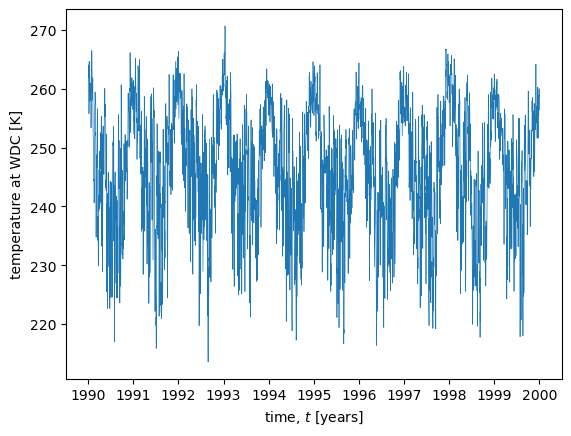

In [12]:
import matplotlib.pyplot as plt
plt.plot(time, T_WDC_2, linewidth = 0.5)
plt.xlabel('time, $t$ [years]');
plt.ylabel('temperature at WDC [K]');

## 3.How does 2-m temperature at WDC compare to 2-m temperature at the South Pole Ice Core? (Make a scatter plot)

Here I am suggesting that we plot the temperature at WDC against the temperature at the South Pole Ice Core, for each day of the record. This provides a direct comparison of the temperatures, at the expense of time information. 

In [13]:
SMB_WDC = SMB[Iy,Ix,:]

The south pole is at X=0, Y=0 in this coordinate system. 

In [14]:
Xq = 0.0
Yq = 0.0

In [15]:
Ix = np.argmin(np.abs(Xq - X))
Iy = np.argmin(np.abs(Yq - Y))
SMB_SP = SMB[Iy,Ix,:]
T_SP = T[Iy,Ix,:]

Text(0, 0.5, 'temp at south pole [K]')

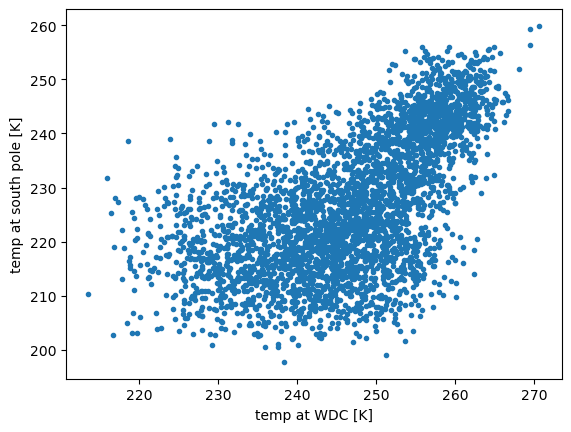

In [16]:
plt.plot(T_WDC,T_SP,'.')
plt.xlabel('temp at WDC [K]')
plt.ylabel('temp at south pole [K]')


## 4.Plot on the same axis (different colors) time series from all the locations contained in the file StationLocations.xls

These are the locations of a few Norwegian, New Zealand and US Antarctic bases
  Obviously you don’t want to have to enter all the coordinates by hand!


Use two separate calls to `np.loadtxt()` to load the station names and the station locations. In each call we specfic a different set of columns to load. 

In [17]:
station_names = np.loadtxt('StationLocations.csv', delimiter = ',', skiprows = 1, usecols = (0), dtype = 'str')

In [18]:
station_locations = np.loadtxt('StationLocations.csv', delimiter = ',', skiprows = 1, usecols = (1,2))

Define a function to interpolate the data, plot the result, and label the plot.

In [19]:
def plot_SMB_timeseries(xq,yq,label):
    Ix = np.argmin(np.abs(xq - X))
    Iy = np.argmin(np.abs(yq - Y))
    plt.plot(time, T[Iy,Ix,:], label=label)
    plt.xlabel('time, $t$ [years]');
    plt.ylabel('temperature [K]');
    plt.legend()
    return Ix, Iy

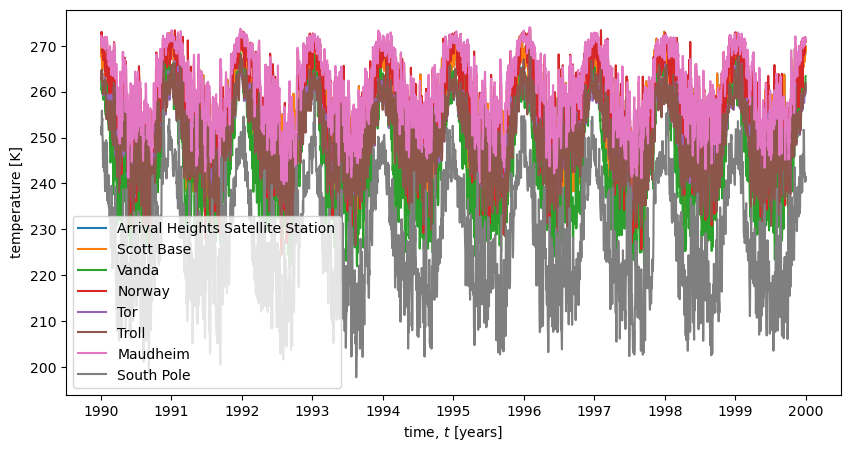

In [20]:
n=0
plt.figure(figsize = (10,5))
for name in station_names:
    plot_SMB_timeseries(station_locations[n,0], station_locations[n,1], name)
    n+=1

## 5.Plot a map of surface mass balance on 18th May 1991 of the model output (what happened on this date?).

Apply the same nearest-neighbor approach to finding the correct time step.

In [21]:
Itime = np.argmin(np.abs(np.datetime64('1991-05-18') - time))

Use `plt.pcolormesh` to plot this time slice as a map.

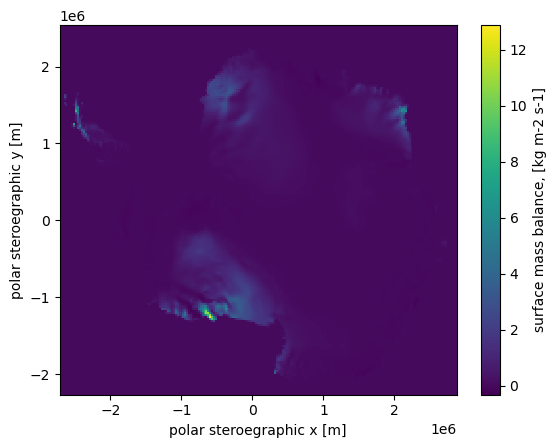

In [22]:
plt.pcolormesh(X,Y,SMB[:,:,Itime])
plt.xlabel('polar steroegraphic x [m]')
plt.ylabel('polar steroegraphic y [m]');
plt.colorbar(label = 'surface mass balance, [kg m-2 s-1]');

For the remainder of the questions, it is easiest to use a package called xarray to manipulate the data. 

Xarray is a package specially designed for analyzing multi-dimensional arrays in python. 

I will also adopt/adapt George Lu's code answering this questions. 

First import xarray

In [23]:
import xarray as xr

Then we take the two three-dimensional arrays SMB and T and put them into an xarray as follows:

In [24]:
data_vars = {'SMB':(['Y','X','time'], R['SMB']*60*60*24*365/rho, 
                         {'units': 'm/a', 
                          'long_name':'Surface mass balance'}),
            'T':(['Y','X','time'], R['T'], 
                         {'units': 'K', 
                          'long_name':'2-m temperature'})}
coords = {'time':(['time'],R['time'],{'units': 'days','long_name':'Date'}),
         'X': (['X'],R['X'],{'units': 'm','long_name':'Y stereographic coordinate'}),
         'Y': (['Y'],R['Y'],{'units': 'm','long_name':'X stereographic coordinate'})}

ds_xr = xr.Dataset(data_vars=data_vars, coords=coords)

The great thing about xarray is that is stores all the data along with spatial and temporal information. To see a representation of the data, simply type in the name of the xarray we just created.

In [25]:
ds_xr

<xarray.Dataset>
Dimensions:  (Y: 178, X: 207, time: 3652)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-02 1990-01-03 ... 2000-01-01
  * X        (X) float64 -2.7e+06 -2.673e+06 -2.646e+06 ... 2.835e+06 2.862e+06
  * Y        (Y) float64 -2.254e+06 -2.227e+06 -2.2e+06 ... 2.498e+06 2.525e+06
Data variables:
    SMB      (Y, X, time) float64 0.0009256 0.0007402 ... 0.0001941 0.0002063
    T        (Y, X, time) float64 276.8 276.6 277.9 275.9 ... 273.8 273.9 274.2

## 6. Plot side-by-side maps of the mean surface temperature and the mean SMB as functions of space.

Taking the mean along a ppartiular dimension is simple in xarray:

In [26]:
SMB_mean  = ds_xr.SMB.mean(dim='time')
SMB_mean.attrs['units'] = 'kg m-2 s-1'
T_mean = ds_xr.T.mean(dim='time')
T_mean.attrs['units'] = 'kelvin'

Plotting is also often a simple operation in xarray; it even takes care of the axis and colorbar labels for you. 


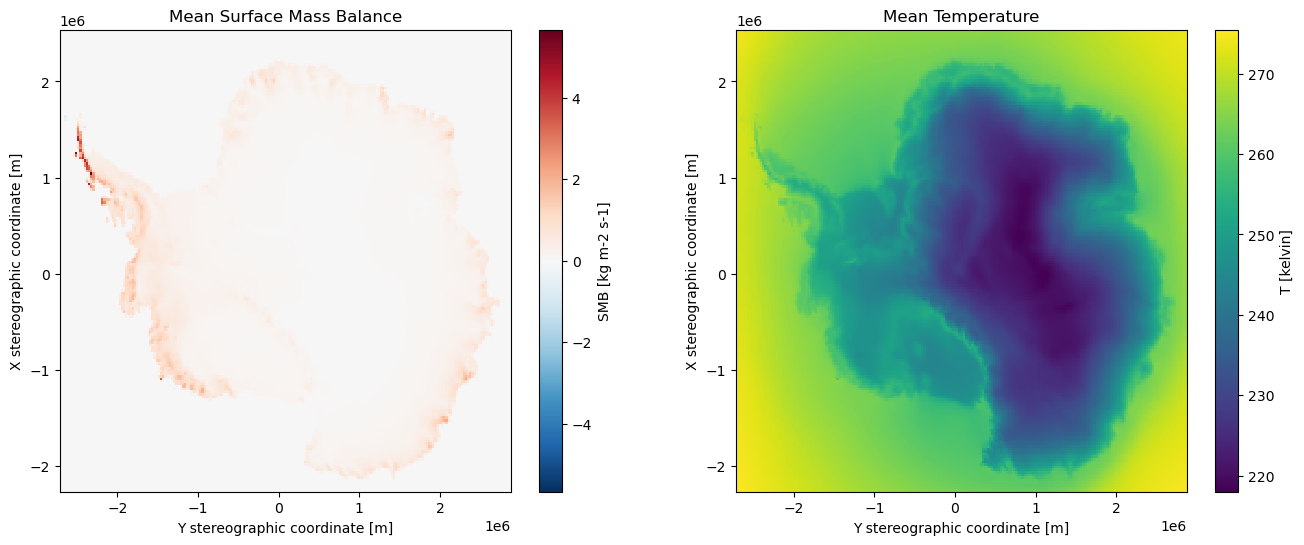

In [27]:
fig,ax = plt.subplots(ncols=2, figsize = (16, 6))
SMB_mean.plot(ax = ax[0])
ax[0].set_title('Mean Surface Mass Balance')

T_mean.plot(ax = ax[1])
ax[1].set_title('Mean Temperature');

## 7. Does mean SMB correlate with mean 2-m temperature?



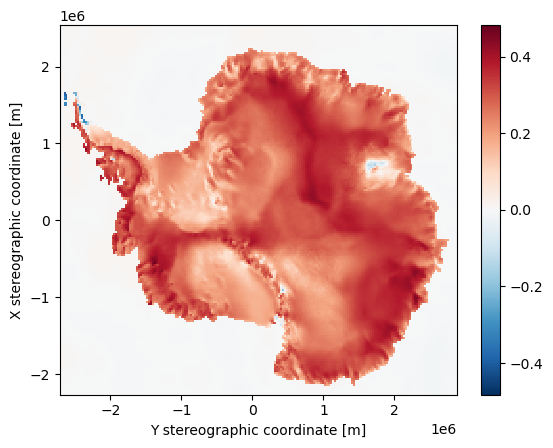

In [28]:
xr.corr(ds_xr.SMB, ds_xr.T, dim = 'time').plot()

## 8. Create a gif animation of air temperature as it varies with time. 

Import the animation module from matplotlib

In [29]:
from matplotlib import animation

Setup the first frame of the animation. 

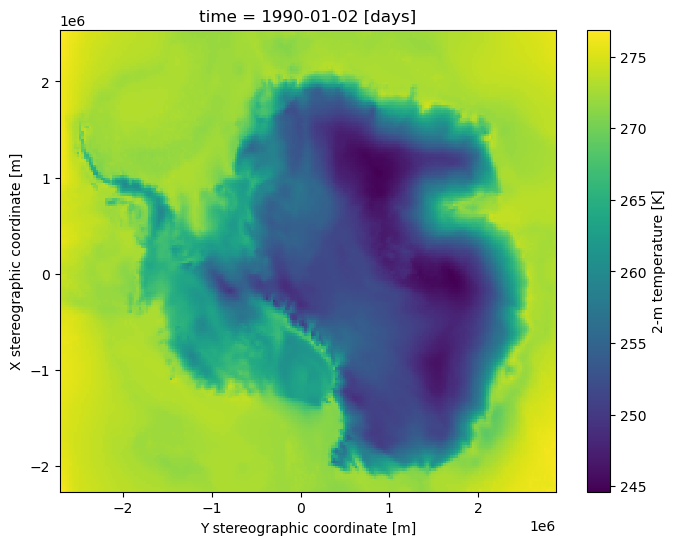

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

to_plot = ds_xr.T.isel(time = 0).plot()

Define a function which creates each from of the animation, given a timestep number.

In [31]:
step_size = 10
def animate(timestep_number):

    to_plot.set_array(ds_xr.T.isel(time = timestep_number*step_size))  # change the data plotted in the figure each frame
    ax.set_title("Time = " + str(ds_xr.time.values[timestep_number*step_size]))  # change the title each frame    

Use the `animation.FuncAnimation` function to create the animation and store it in `anim`.


In [69]:
anim = animation.FuncAnimation(fig, animate, frames = ds_xr.time.size//step_size, repeat=True)

Display the animation in an interactive widget in this notebook.

In [ ]:
from IPython.display import HTML, display
HTML(anim.to_jshtml())

Save the animation to a gif. 

In [ ]:
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
anim.save('T2m.gif', writer=writer)